In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sadiajavedd_students_academic_performance_dataset_path = kagglehub.dataset_download('sadiajavedd/students-academic-performance-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'students-academic-performance-dataset' dataset.
Data source import complete.


# ****Introduction**** #

### In this notebook i will try to examine the students-academic-performance dataset and i will try to visualize the relation between different factors affecting student's marks.
### We will also see if we can apply predictive modelling on this dataset.

# Importing Libraries

In [ ]:
# Importing Basic Libraries, we will import others along the way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
df = pd.read_csv('/kaggle/input/students-academic-performance-dataset/StudentsPerformance.csv')

## Peeking
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploratory Data Analysis (EDA)

## Basic Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Descriptive Statistics

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Checking Missing Values

In [ ]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## Average score by gender

In [ ]:
avg_gender_score = df.groupby('gender')[['math score','reading score','writing score']].mean()
avg_gender_score

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


## Number of students per gender

In [ ]:
gender_count = df['gender'].value_counts()
gender_count

,count
gender,
female,518
male,482


## Plotting Number of students by gender

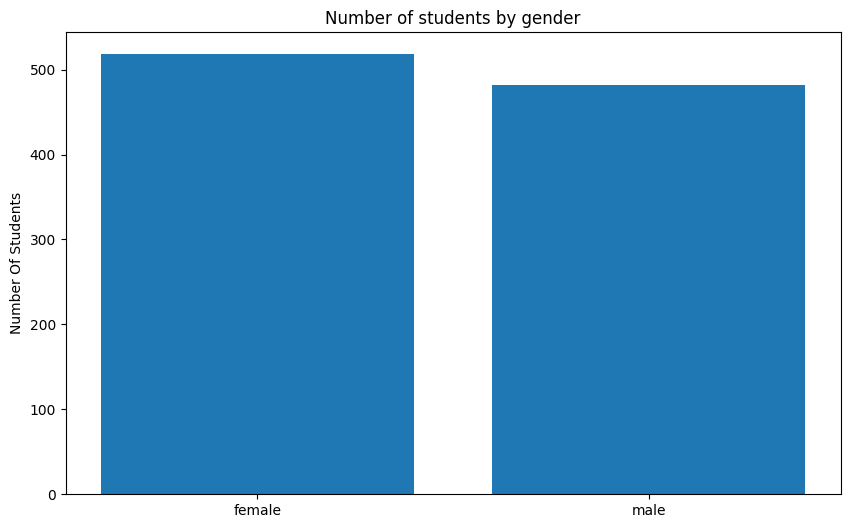

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(gender_count.index,gender_count.values)
plt.title('Number of students by gender')
plt.ylabel('Number Of Students');

In [ ]:
race_count = df['race/ethnicity'].value_counts()
race_count

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


## Plotting Students By Race

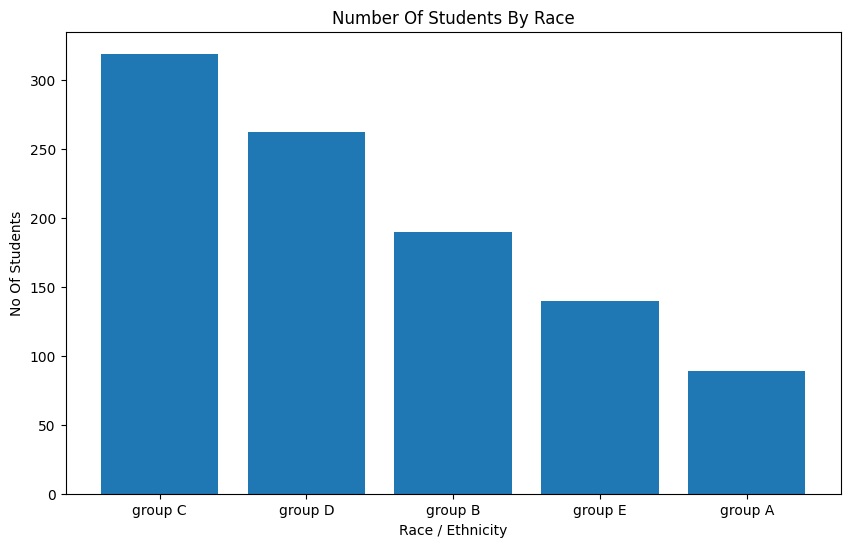

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(race_count.index,race_count.values)
plt.title('Number Of Students By Race')
plt.ylabel('No Of Students');
plt.xlabel('Race / Ethnicity');

## Correlation Heatmap For Numerical Features

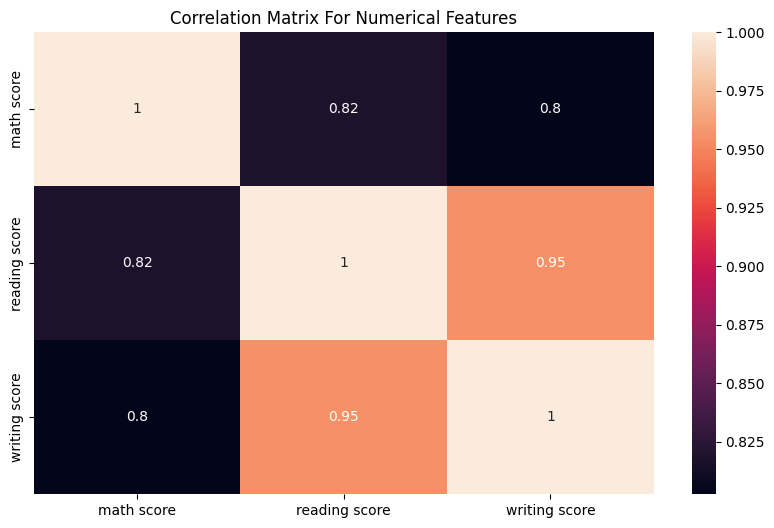

In [ ]:
num_df = df[['math score', 'reading score' , 'writing score']]
corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot = True);
plt.title('Correlation Matrix For Numerical Features');

# Predictive Analysis
### Getting Data Ready

In [ ]:
df['score'] = df[['math score','reading score', 'writing score']].mean(axis=1)

## One Hot Encoding Categorical Data

In [ ]:
df_encoded = pd.get_dummies(df,drop_first=True)

## Splitting Training And Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

## Initializing x and y

x = df_encoded.drop('score',axis=1)
y = df_encoded['score']

## Now we split :)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


## Fitting and making predictions

In [ ]:
## First we initialize
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Fitting
model.fit(x_train , y_train)

# Predictions
y_preds = model.predict(x_test)

# Evaluating Model

### MSE And R2

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)

print(f'Mean Squared Error Of Model : {mse:.2f}')
print(f'R2 Score Of Model : {r2:.2f}')

Mean Squared Error Of Model : 1.38
R2 Score Of Model : 0.99


# Feature Importance

In [ ]:
importance = pd.Series(model.feature_importances_,index = x.columns)

## Plotting Feature Importance

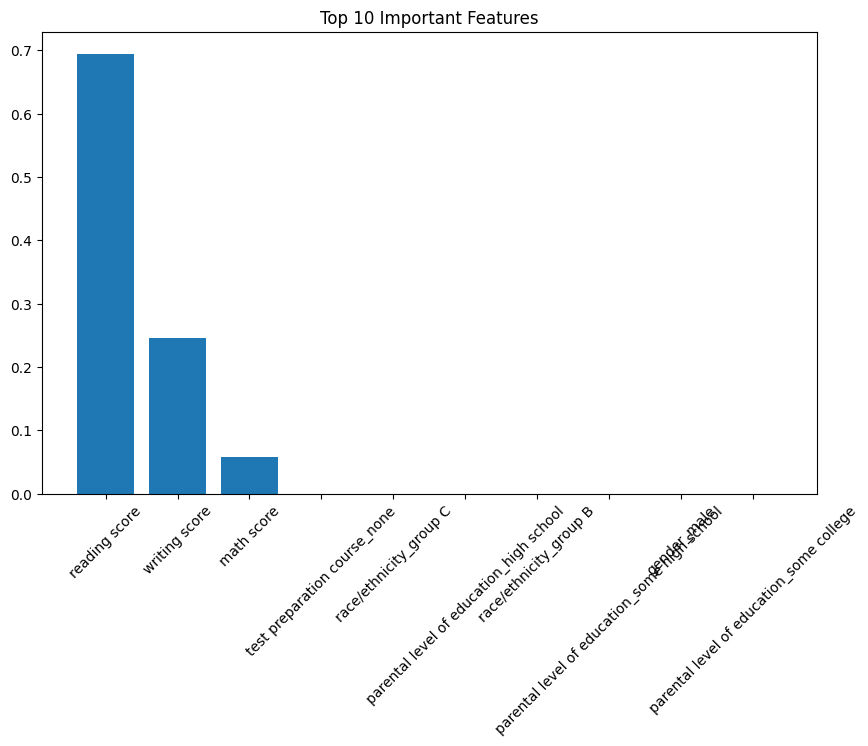

In [ ]:
# Top 10 most important features
top10 = importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10.index,top10.values)
plt.xticks(rotation=45)
plt.title('Top 10 Important Features');


### Looking at this we see that there is something we did wrong so we will drop these columns and try again to see if it improves

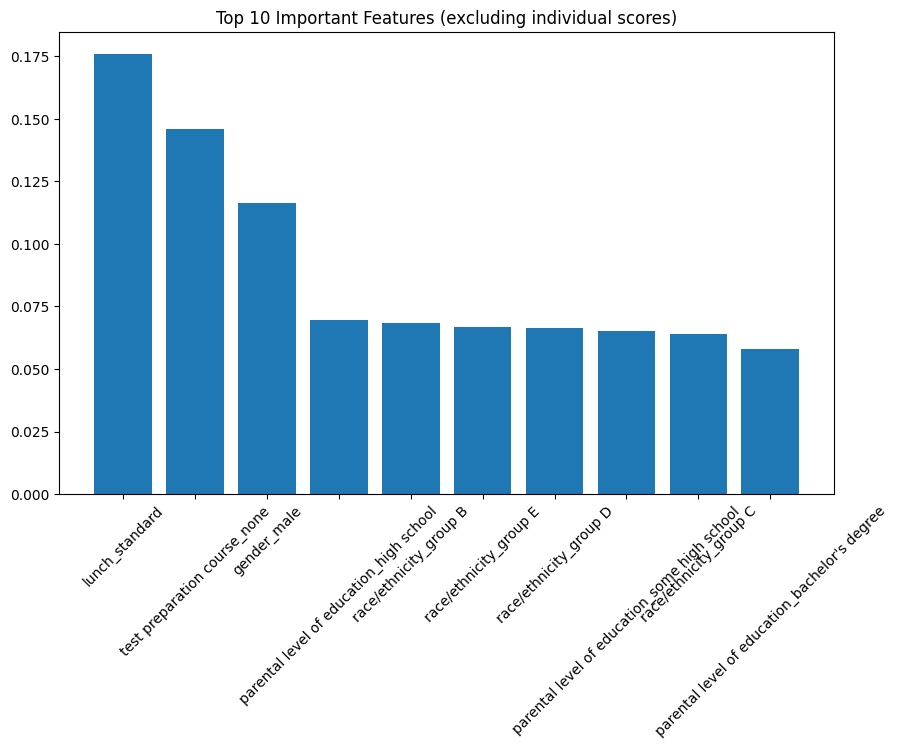

In [ ]:
X_new = df_encoded.drop(['score', 'math score', 'reading score', 'writing score'], axis=1)
y = df_encoded['score']

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_new, y)

importance2 = pd.Series(model2.feature_importances_, index=X_new.columns)
top10 = importance2.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45)
plt.title('Top 10 Important Features (excluding individual scores)')
plt.show()

### Now this is much better :)

# **Conclusion**

### While analyzing student's performance using the Random Forest model, after removing the raw scores variable, the model pointed out that the main variables influencing overall performance are test preparation, parental education, and lunch type. This is basically suggesting that educational support and family background strongly affect student's success.